Punto 1:

Para definir nuestra función y luego buscar su derivada y su integral, debemos importar las librerías adecuadas, en este caso, numpy y scipy son imprescindibles

In [8]:
import numpy as np
import scipy as sp
import pylab as plt
from scipy import integrate

Definimos la función:

In [14]:
f=lambda λ: sp.integrate.quad(lambda x: np.sin(λ*x)/np.exp(x),0,np.inf,limit=100)[0]

C:\Users\Arturo\AppData\Local\Temp/ipykernel_13180/1958542971.py:1: RuntimeWarning: overflow encountered in exp
  f=lambda λ: sp.integrate.quad(lambda x: np.sin(λ*x)/np.exp(x),0,np.inf,limit=100)[0]
C:\Users\Arturo\AppData\Local\Temp/ipykernel_13180/1958542971.py:1: IntegrationWarning: The maximum number of subdivisions (100) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  f=lambda λ: sp.integrate.quad(lambda x: np.sin(λ*x)/np.exp(x),0,np.inf,limit=100)[0]


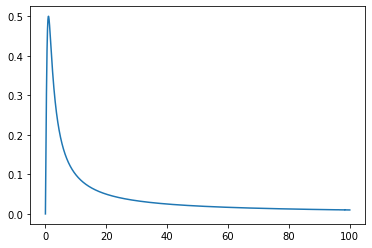

In [15]:
x=np.arange(0,100,0.01)
y=np.zeros(len(x))
for i in range(len(x)):
    y[i]=f(x[i])
plt.plot(x,y)

ahora, podemos usar la el método de diferencias centrales con scipy para hallar la derivada de esta función numéricamente:

C:\Users\Arturo\AppData\Local\Temp/ipykernel_13180/1958542971.py:1: RuntimeWarning: overflow encountered in exp
  f=lambda λ: sp.integrate.quad(lambda x: np.sin(λ*x)/np.exp(x),0,np.inf,limit=100)[0]
C:\Users\Arturo\AppData\Local\Temp/ipykernel_13180/1958542971.py:1: IntegrationWarning: The maximum number of subdivisions (100) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  f=lambda λ: sp.integrate.quad(lambda x: np.sin(λ*x)/np.exp(x),0,np.inf,limit=100)[0]


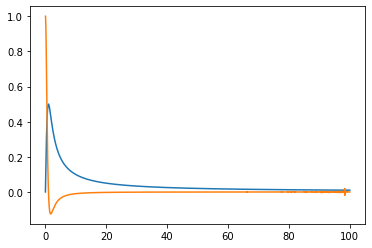

In [16]:
from scipy.misc import derivative
h=lambda x: derivative(f,x,0.01)
y1=np.zeros(len(x))
for i in range(len(x)):
    y1[i]=h(x[i])
plt.plot(x,y)
plt.plot(x,y1)

Ahore generemos una matriz 3x3 con índices aleatorios, para esto es útil la librería numpy.random

In [118]:
np.random.seed(5)
Y=np.random.uniform(0,1,size=(3,3))
Yt=np.transpose(Y)
Y

array([[0.22199317, 0.87073231, 0.20671916],
       [0.91861091, 0.48841119, 0.61174386],
       [0.76590786, 0.51841799, 0.2968005 ]])

Ahora generamos la matriz A que es la multiplicación entre Y transpuesta y Y

In [119]:
A=Yt@Y
A

array([[1.47974181, 1.03901688, 0.83516666],
       [1.03901688, 1.26547745, 0.63264631],
       [0.83516666, 0.63264631, 0.5050539 ]])

Ahora con scipy podemos hallar los autovalores y autovectores de A

In [120]:
Aei=sp.linalg.eig(A)

In [121]:
print("Los autovalores de A son",Aei[0])

Los autovalores de A son [2.87713176+0.j 0.34973568+0.j 0.02340572+0.j]


In [122]:
print("Los autovectores de A son:",Aei[1])

Los autovectores de A son: [[-0.68887974 -0.55931069 -0.4611033 ]
 [-0.60238876  0.79554937 -0.06503068]
 [-0.40320279 -0.23296513  0.88496031]]


Hacemos lo mismo con Y

In [123]:
Yei=sp.linalg.eig(Y)

In [124]:
print("Los autovalores de Y son",abs(Yei[0]))

Los autovalores de Y son [1.64507601 0.410762   0.22710915]


In [125]:
print("Los autovectores de Y son:",Yei[1])

Los autovectores de Y son: [[-0.4944609  -0.75235324 -0.62071789]
 [-0.67941798  0.42779998  0.13687313]
 [-0.5421251   0.50095088  0.7719942 ]]


Veamos si la raiz cuadrada de los autovalores de A son igual a los autovalores de Y

In [127]:
Aei[0]**0.5

array([1.696211  +0.j, 0.59138455+0.j, 0.15298929+0.j])

Los arreglos nos dan valores muy parecidos entre la raiz cuadrada de los autovalores de A y los autovalores de Y